In [652]:
#!/usr/bin/env python
# -=-<[ Bismillahirrahmanirrahim ]>-=-
# -*- coding: utf-8 -*-
# @Date    : 2022-11-06 00:07:21
# @Author  : Dahir Muhammad Dahir (dahirmuhammad3@gmail.com)
# @Link    : link
# @About : Intro to neural networks by Andrej Karpathy


import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [653]:
def f(x):
    return 3 * x ** 2 - 4 * x + 5

In [654]:
f(3)

20

In [655]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [656]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

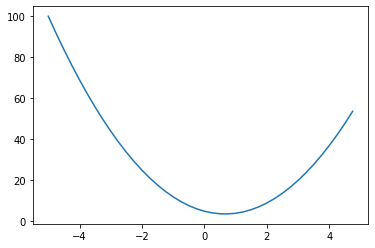

In [657]:
plt.plot(xs, ys)

In [658]:
h = 0.001
x = 3.0
f(x + h)


20.014003000000002

In [659]:
f(x + h) - f(x)

0.01400300000000243

In [660]:
(f(x + h) - f(x)) / h

14.00300000000243

In [661]:
x = -3.0

(f(x + h) - f(x)) / h

-21.996999999998934

In [662]:
x = 2/3
h = 0.000001

(f(x + h) - f(x)) / h

2.999378523327323e-06

In [663]:
# let's get more complex

a = 2.0
b = -3.0
c = 10.0
d = a * b + c
d

4.0

In [664]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c

a += h

d2 = a * b + c

print(f'd1 {d1}')

print(f'd2 {d2}')

print(f'slope {(d2 - d1) / h}')

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [665]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c

b += h

d2 = a * b + c

print(f'd1 {d1}')

print(f'd2 {d2}')

print(f'slope {(d2 - d1) / h}')

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [666]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c

c += h

d2 = a * b + c

print(f'd1 {d1}')

print(f'd2 {d2}')

print(f'slope {(d2 - d1) / h}')

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [667]:
class Value:

    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Value(data={self.data})_{self._op}"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward
        
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self, ), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        
        out._backward = _backward

        return out
    
    def __rmul__(self, other):
        return self * other
    
    def __radd__(self, other):
        return self + other
    
    def __truediv__(self, other):
        return self * other**-1
    
    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + (-other)
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward

        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)

        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

a = Value(5)

2 * a

Value(data=10)_*

In [668]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root, format='svg', rankdir='LR'):
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

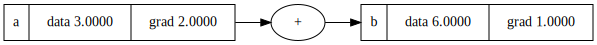

In [669]:
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

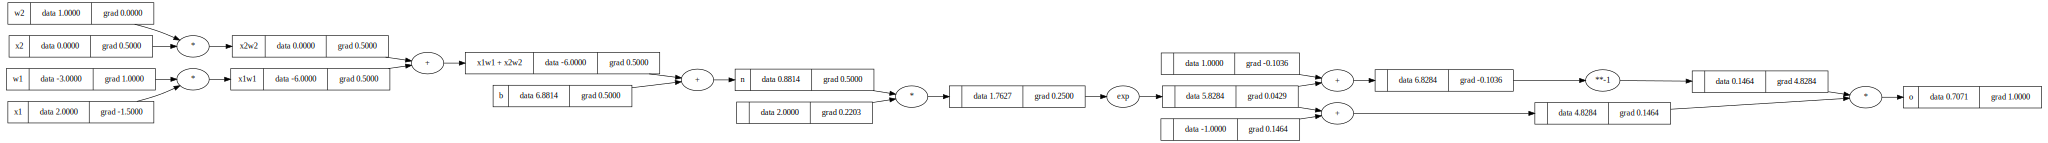

In [670]:
# inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of the neuron
b = Value(6.8813735870195432, label="b")

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1; x1w1.label = "x1w1"
x2w2 = x2 * w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"

e = (2*n).exp()
o = (e - 1) / (e + 1)

o.label = "o"

o.backward()
draw_dot(o)


In [671]:
import torch

x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1 * w1 + x2 * w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print("---")
print("x2", x2.grad.item())
print("w2", w2.grad.item())
print("x1", x1.grad.item())
print("w1", w1.grad.item())


0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [672]:

import random


class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
    
    def __call__(self, x):
        # w * x + b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]


class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]



In [673]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.8632385704597962)_tanh

In [674]:

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets


In [709]:
for k in range(50):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])

    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.01 * p.grad
    
    print(k, loss.data, )




0 0.002822243292613917
1 0.002819182234960707
2 0.0028161276174275543
3 0.002813079419949882
4 0.0028100376225458235
5 0.0028070022053158263
6 0.0028039731484421106
7 0.0028009504321884785
8 0.0027979340368996224
9 0.0027949239430009208
10 0.002791920130997937
11 0.0027889225814760293
12 0.0027859312750999248
13 0.0027829461926133464
14 0.0027799673148385957
15 0.0027769946226761846
16 0.002774028097104356
17 0.0027710677191788245
18 0.00276811347003221
19 0.002765165330873843
20 0.0027622232829891966
21 0.002759287307739635
22 0.0027563573865619687
23 0.002753433500968086
24 0.002750515632544584
25 0.002747603762952377
26 0.0027446978739263357
27 0.0027417979472749193
28 0.0027389039648797963
29 0.0027360159086954857
30 0.0027331337607489955
31 0.002730257503139445
32 0.0027273871180377163
33 0.0027245225876861142
34 0.002721663894397961
35 0.0027188110205573182
36 0.0027159639486185622
37 0.002713122661106052
38 0.002710287140613824
39 0.0027074573698052133
40 0.002704633331412487
41

In [710]:
ypred


[Value(data=0.9807726126414054)_tanh,
 Value(data=-0.9874052818719625)_tanh,
 Value(data=-0.965635918843678)_tanh,
 Value(data=0.9688509597894225)_tanh]